## Convert Audio to image

# Here is a title
This version join the record of all folder (balance training, unbalance training and eval) together.

## Convert Audio to image

In [ ]:
import librosa.display
import librosa

import matplotlib.pyplot as plt
import matplotlib

import pandas as pd

import numpy as np
from IPython.display import Audio
import csv
import random
import os
import shutil

Create a dataset from the urban sound 8K dataset that contains all engine idling sounds as well as an equal number of random sounds taken from the other categories. Doing so using the UrbanSound8k csv with the labels and IDs of the files


In [ ]:
# create a list with all the IDs for car engine idling sounds

#us_file = 'C:/Users/matthias/Documents/Projects/urban_sound_files/UrbanSound8K.csv'
us_file = '/Users/giacomo/Documents/lavoro/sound8k_data/UrbanSound8K.csv'
list_ideng_files = []
list_of_other_sounds = []

#set a variable that can be used later. Out of the 8732 files 1000 are idling engine sounds. 
# 12.9% are the amount of files (1000) that are not idling_engine sounds The variable is needed to pick files that are non idling_engine sounds
# with a random probability of 12.9 % in order to create a balanced dataset containing idling_engine and non idling_engine sounds.  
append_probability = 12.93 # 100 / 7732 * 100
random.seed(50)


with open(us_file) as csv_file:
    reader = csv.reader(csv_file)
    
    for line in reader:
        if 'engine_idling' in line:
            list_ideng_files.append(line[0])
        else: 
            # append lines with a probability of 12.9 %
            if random.randint(0,100) <= append_probability: 
                    list_of_other_sounds.append(line[0])
   
                



In [ ]:
    
# copy all files that are found in either one of the two lists.

sound_folder = '/Users/giacomo/Documents/lavoro/sound8k_data/our_dataset/'

# create a list of all files paths from the dataset within the subfolders 

sound_files =[os.path.join(root, file) for root, directories, files in os.walk(sound_folder) for file in files]

destination_folder = '/Users/giacomo/Documents/lavoro/sound8k_data/test_data'

# Now copy all files present in the two lists into a new folder (destination folder var)
for path in sound_files:
    filename = os.path.basename(path)
    if filename in (list_ideng_files + list_of_other_sounds):
        destination = os.path.join(destination_folder, filename)
        shutil.copy2(path, destination_folder)

## Create mel spectrograms

First we check one of the samples just to make sure everything is right. We take a look at a waveplot as well as a mel spectrogram.
After that we will create mel spectrograms for each audio file.

In [ ]:
# select an audio file as an example
audio_file =  '/Users/giacomo/Documents/lavoro/sound8k_data/our_dataset/344-3-5-0.wav'


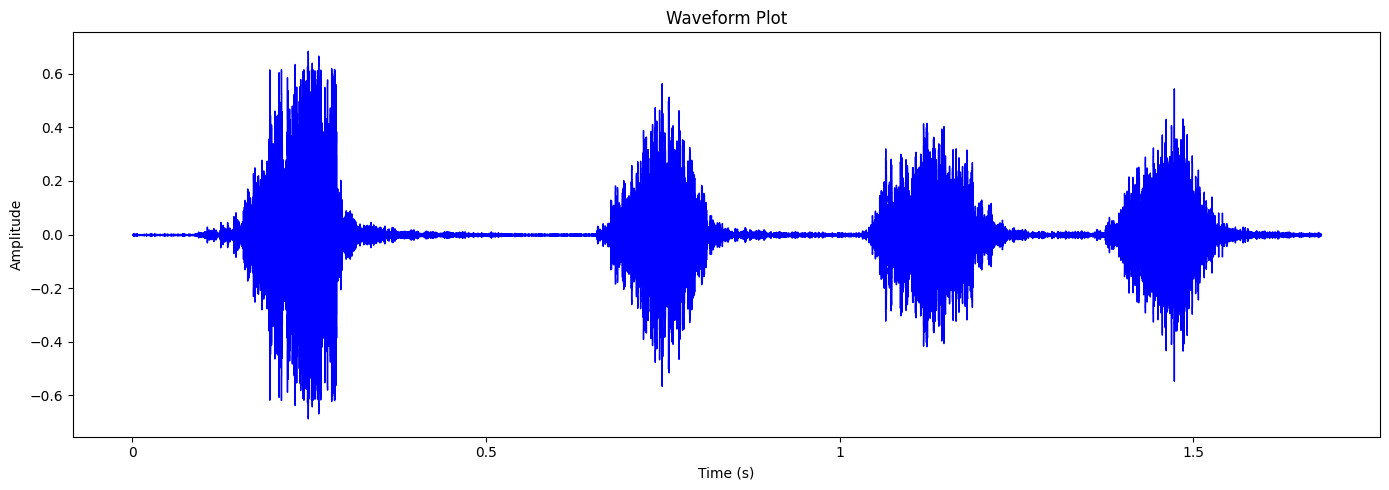

In [ ]:


#If samples are not already, convert to np.array, can probably be simpflified, no need for if check

y, sr = librosa.load(audio_file)
if not isinstance(y, np.ndarray):
    samples = np.array(y)


plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr, color='b') #color specification needed due to version incompatibility problems btw librosa and matplotlib
plt.title('Waveform Plot')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.tight_layout()
plt.show()




In [ ]:
# Listen to the audio 
Audio(audio_file)


/var/folders/65/jjhht_kn6479d_8drvxjcgjh0000gn/T/ipykernel_14674/3558297780.py:4: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(sgram)


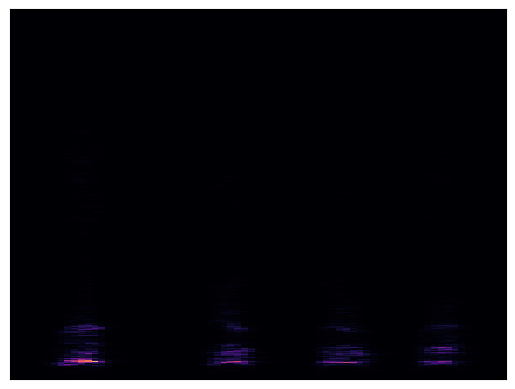

In [ ]:
#Apply fourier transformation and plot 

sgram = librosa.stft(y)
librosa.display.specshow(sgram)

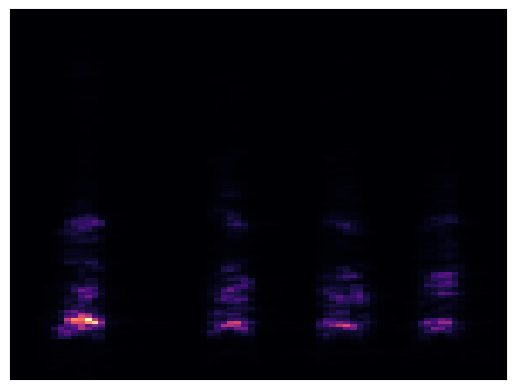

In [ ]:
# Create a mel spectrogramm 
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sr)
librosa.display.specshow(mel_scale_sgram)


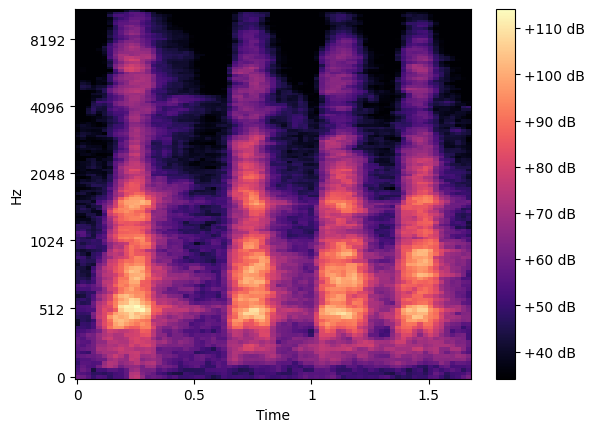

In [ ]:

mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(mel_sgram, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

In [ ]:
def create_mel_specs (path_to_wav, path_to_png):

    #create a list of all wav files needed to be converted: 
    
    file_list = [file for file in os.listdir(path_to_wav)]
    print(file_list)
    
    for file in file_list:    
        
        #create correct file name for saving
        audio_file = os.path.join(path_to_wav, file)
        output_file = os.path.join(path_to_png, os.path.splitext(file)[0] + '.png')
        
        # load the files and transfrom into np array
        samples, sample_rate = librosa.load(audio_file)
        if not isinstance(samples, np.ndarray):
            samples = np.array(samples)
        
        #apply a stft transformation    
        stft = librosa.stft(samples)

        #modify it in order to use the mel-scale instead of frenquency
        mel_scale_spec, par = librosa.magphase(stft)
        mel_spec = librosa.feature.melspectrogram(S=mel_scale_spec, sr=sample_rate)

        # Go from amplitude to db 
        mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.min)

        # create and save the figure
        #plt.figure()        
        #librosa.display.specshow(mel_spec_db, x_axis='time', y_axis='mel', sr=sample_rate, fmax=8000)
        #plt.axis('off')

        #save plot without any white border
        plt.savefig(output_file, bbox_inches='tight', pad_inches=0, transparent=True)
                

In [ ]:
#Test section for the function

# here one might need to activate in order to save the images
## matplotlib.use('Agg')
# This can become a problem later on when trying to show plots in the notebook. Fixed it by restarting the kernel

path_to_wav = '/Users/giacomo/Documents/lavoro/sound8k_data/our_dataset/'
path_to_png = '/Users/giacomo/Documents/lavoro/sound8k_data/mel_specs/'
test = create_mel_specs(path_to_wav, path_to_png)

['44737-5-0-2.wav', '133494-2-0-26.wav', '209992-5-2-81.wav', '145206-6-4-0.wav', '94632-5-0-0.wav', '155217-9-1-24.wav', '17853-5-0-11.wav', '201988-5-0-8.wav', '195451-5-0-4.wav', '159726-3-0-0.wav', '146845-0-0-21.wav', '159742-8-0-12.wav', '201988-5-0-21.wav', '155127-9-0-2.wav', '74726-8-2-1.wav', '128160-5-0-15.wav', '209992-5-2-42.wav', '65381-3-0-7.wav', '180937-7-2-6.wav', '54823-3-0-0.wav', '34771-3-0-5.wav', '147926-0-0-44.wav', '39856-5-0-28.wav', '72259-1-10-0.wav', '195451-5-0-11.wav', '39856-5-0-14.wav', '61503-2-0-5.wav', '113202-5-0-0.wav', '176787-5-0-9.wav', '113203-5-3-1.wav', '50618-6-0-0.wav', '156358-5-0-2.wav', '71529-4-1-3.wav', '81068-5-0-1.wav', '113205-5-1-4.wav', '201652-5-4-9.wav', '113216-5-0-0.wav', '107228-5-0-3.wav', '106015-5-0-0.wav', '16692-5-0-7.wav', '62566-5-1-1.wav', '194321-9-0-61.wav', '17853-5-0-3.wav', '177729-0-0-28.wav', '39884-5-0-0.wav', '165775-7-1-0.wav', '137156-9-0-73.wav', '144007-5-0-9.wav', '128607-4-0-4.wav', '182739-2-0-24.wav',

/Users/giacomo/.pyenv/versions/3.9.7/envs/thunder_recognition/lib/python3.9/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(


<Figure size 640x480 with 0 Axes>

In [ ]:
# actual application of the function:

""" path_to_wav = 'C:/Users/matthias/Documents/Projects/urban_sound_files/our_dataset/'
path_to_png = 'C:/Users/matthias/Documents/Projects/urban_sound_files/mel_specs/'
test = create_mel_specs(path_to_wav, path_to_png) """

" path_to_wav = 'C:/Users/matthias/Documents/Projects/urban_sound_files/our_dataset/'\npath_to_png = 'C:/Users/matthias/Documents/Projects/urban_sound_files/mel_specs/'\ntest = create_mel_specs(path_to_wav, path_to_png) "

## Create NNs

## import metadata 

import the UrbanSound8k csv, filter out all entries that are not used in this project and take a look at the data.


In [ ]:
df = pd.read_csv(us_file, header=0)
print(df.head(5))

      slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing  


In [ ]:
# get rid of all unused files

filtered_df = df[df['slice_file_name'].isin(list_ideng_files + list_of_other_sounds)]
    
print(filtered_df.head(10))

      slice_file_name    fsID  start   end  salience  fold  classID  \
8   100263-2-0-36.wav  100263   18.0  22.0         1     5        2   
14   100652-3-0-0.wav  100652    0.0   4.0         1     2        3   
17   100652-3-0-3.wav  100652    1.5   5.5         1     2        3   
22   100852-0-0-0.wav  100852    0.0   4.0         1     5        0   
28  100852-0-0-14.wav  100852    7.0  11.0         1     5        0   
29  100852-0-0-15.wav  100852    7.5  11.5         1     5        0   
36  100852-0-0-21.wav  100852   10.5  14.5         1     5        0   
74  101729-0-0-18.wav  101729    9.0  13.0         2     9        0   
79  101729-0-0-24.wav  101729   12.0  16.0         2     9        0   
81  101729-0-0-28.wav  101729   14.0  18.0         2     9        0   

               class  
8   children_playing  
14          dog_bark  
17          dog_bark  
22   air_conditioner  
28   air_conditioner  
29   air_conditioner  
36   air_conditioner  
74   air_conditioner  
79   air_co

In [ ]:
# As we are only interested in idling engine sounds and use the other files as a non engine control to train our network, 
# we now change the label of everything that is non idling engine sound to that.

filtered_df.loc[filtered_df['class'] != 'engine_idling', 'class'] = 'non_idling_engine'
print(filtered_df.head(100))

       slice_file_name    fsID  start   end  salience  fold  classID  \
8    100263-2-0-36.wav  100263   18.0  22.0         1     5        2   
14    100652-3-0-0.wav  100652    0.0   4.0         1     2        3   
17    100652-3-0-3.wav  100652    1.5   5.5         1     2        3   
22    100852-0-0-0.wav  100852    0.0   4.0         1     5        0   
28   100852-0-0-14.wav  100852    7.0  11.0         1     5        0   
..                 ...     ...    ...   ...       ...   ...      ...   
250   103258-5-0-3.wav  103258    1.5   5.5         1     1        5   
251   103258-5-0-4.wav  103258    2.0   6.0         1     1        5   
252   103258-5-0-5.wav  103258    2.5   6.5         1     1        5   
253   103258-5-0-6.wav  103258    3.0   7.0         1     1        5   
254   103258-5-0-7.wav  103258    3.5   7.5         1     1        5   

                 class  
8    non_idling_engine  
14   non_idling_engine  
17   non_idling_engine  
22   non_idling_engine  
28   non_i

In [ ]:
from tensorflow import keras

# Preprocess and batch the dataset (add any necessary preprocessing here)
data_df = filtered_df[['slice_file_name', 'class']]
data_df['slice_file_name'] = data_df['slice_file_name'].str.replace('.wav', '.png')
dataset_path = '/Users/giacomo/Documents/lavoro/sound8k_data/mel_specs/' #where the mel specs are
# Create an ImageDataGenerator for data loading and preprocessing
datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values to the range [0, 1]
    validation_split=0.2  # Split the data into training and validation sets
)

# Use flow_from_dataframe to load and preprocess the images
batch_size = 32  # Adjust this according to your needs
train_generator = datagen.flow_from_dataframe(
    data_df,
    directory=dataset_path,
    x_col="slice_file_name",  # Column containing filenames
    y_col="class",  # Column containing class labels
    target_size=(224, 224),  # Reshape your images to a desired size
    batch_size=batch_size,
    class_mode='categorical',  # If you have multiple classes
    subset='training'  # For the training set
)

validation_generator = datagen.flow_from_dataframe(
    data_df,
    directory=dataset_path,
    x_col="slice_file_name",
    y_col="class",
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # For the validation set
)

num_classes = len(train_generator.class_indices)  # Get the number of classes

train_generator


Found 907 validated image filenames belonging to 2 classes.
Found 226 validated image filenames belonging to 2 classes.


/var/folders/65/jjhht_kn6479d_8drvxjcgjh0000gn/T/ipykernel_11507/1917532251.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['slice_file_name'] = data_df['slice_file_name'].str.replace('.wav', '.png')
/Users/giacomo/.pyenv/versions/3.9.7/envs/thunder_recognition/lib/python3.9/site-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 882 invalid image filename(s) in x_col="slice_file_name". These filename(s) will be ignored.
  warnings.warn(
/Users/giacomo/.pyenv/versions/3.9.7/envs/thunder_recognition/lib/python3.9/site-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 882 invalid image filename(s) in x_col="slice_file_name". These filename(s) will be ignored.
  warnings.warn(


In [ ]:
#split the dataset into traning and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    data_df["slice_file_name"], data_df["class"], test_size=0.2, random_state=42
)


731         engine_idling
2924    non_idling_engine
5727        engine_idling
710         engine_idling
6912    non_idling_engine
              ...        
4777    non_idling_engine
5452    non_idling_engine
3523    non_idling_engine
6184    non_idling_engine
4754    non_idling_engine
Name: class, Length: 1612, dtype: object

In [ ]:

# Define your model
def define_model (input_shape):
    model = tf.keras.Sequential([
        
        tf.keras.layers.Input(shape=input_shape),
        
        tf.keras.layers.Dense(264, activation="relu"),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Dense(1, activation="sgd")
        ])

# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(dataset, epochs=10)
    


In [ ]:
# setup tensorboard
root_logdir = os.path.join(os.curdir, 'logs')

tb_callback = tf.keras.callbacks.TensorBoard(log_dir='logs/', histogram_freq=1)



In [ ]:
# launch tensorboard
%load_ext tensorboard
%tensorboard --logdir logs/fit


In [1]:
import librosa.display
import librosa

import matplotlib.pyplot as plt
import matplotlib

import pandas as pd

import numpy as np
from IPython.display import Audio
import csv
import random
import os
import shutil

Create a dataset from the urban sound 8K dataset that contains all engine idling sounds as well as an equal number of random sounds taken from the other categories. Doing so using the UrbanSound8k csv with the labels and IDs of the files


In [10]:
# create a list with all the IDs for car engine idling sounds

us_file = 'C:/Users/matthias/Documents/Projects/urban_sound_files/UrbanSound8K.csv'
list_ideng_files = []
list_of_other_sounds = []

#set a variable that can be used later. Out of the 8732 files 1000 are idling engine sounds. 
# 12.9% are the amount of files (1000) that are not idling_engine sounds The variable is needed to pick files that are non idling_engine sounds
# with a random probability of 12.9 % in order to create a balanced dataset containing idling_engine and non idling_engine sounds.  
append_probability = 12.93 # 100 / 7732 * 100
random.seed(50)


with open(us_file) as csv_file:
    reader = csv.reader(csv_file)
    
    for line in reader:
        if 'engine_idling' in line:
            list_ideng_files.append(line[0])
        else: 
            # append lines with a probability of 12.9 %
            if random.randint(0,100) <= append_probability: 
                    list_of_other_sounds.append(line[0])
   
                



In [33]:
    
# copy all files that are found in either one of the two lists.

sound_folder = 'C:/Users/matthias/Documents/Projects/urban_sound_files/keggel_dataset'

# create a list of all files paths from the dataset within the subfolders 

sound_files =[os.path.join(root, file) for root, directories, files in os.walk(sound_folder) for file in files]

destination_folder = 'C:/Users/matthias/Documents/Projects/urban_sound_files/test_data'

# Now copy all files present in the two lists into a new folder (destination folder var)
for path in sound_files:
    filename = os.path.basename(path)
    if filename in (list_ideng_files + list_of_other_sounds):
        destination = os.path.join(destination_folder, filename)
        shutil.copy2(path, destination_folder)

## Create mel spectrograms

First we check one of the samples just to make sure everything is right. We take a look at a waveplot as well as a mel spectrogram.
After that we will create mel spectrograms for each audio file.

In [2]:
# select an audio file as an example
audio_file =  'C:/Users/matthias/Documents/Projects/urban_sound_files/our_dataset/344-3-5-0.wav'


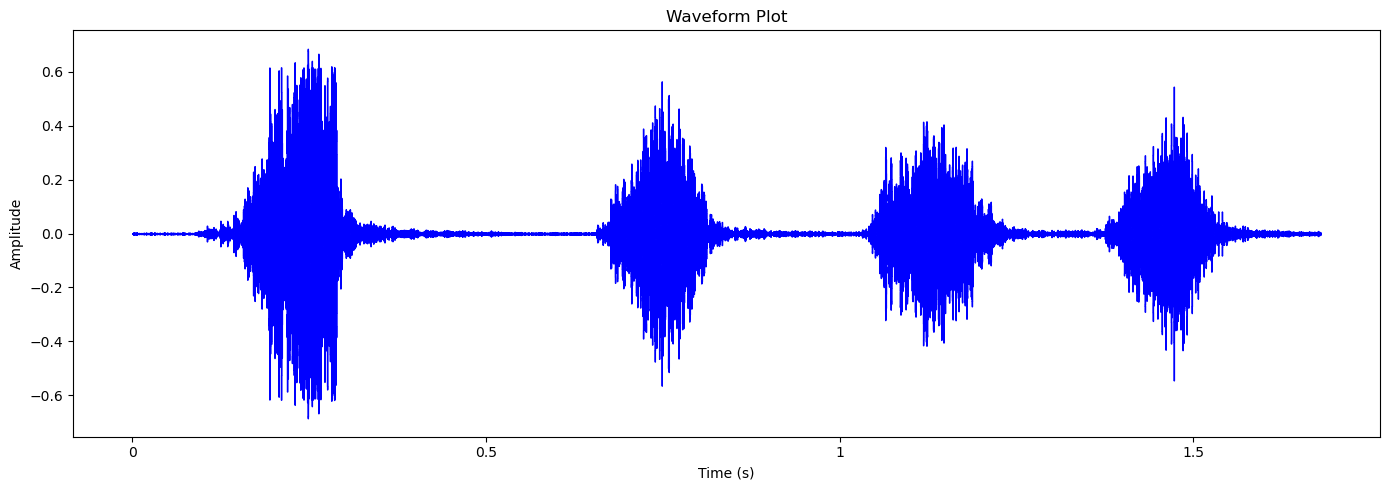

In [3]:


#If samples are not already, convert to np.array, can probably be simpflified, no need for if check

y, sr = librosa.load(audio_file)
if not isinstance(y, np.ndarray):
    samples = np.array(y)


plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr, color='b') #color specification needed due to version incompatibility problems btw librosa and matplotlib
plt.title('Waveform Plot')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.tight_layout()
plt.show()




In [4]:
# Listen to the audio 
Audio(audio_file)


C:\Users\matthias\AppData\Local\Temp\ipykernel_16068\3558297780.py:4: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(sgram)


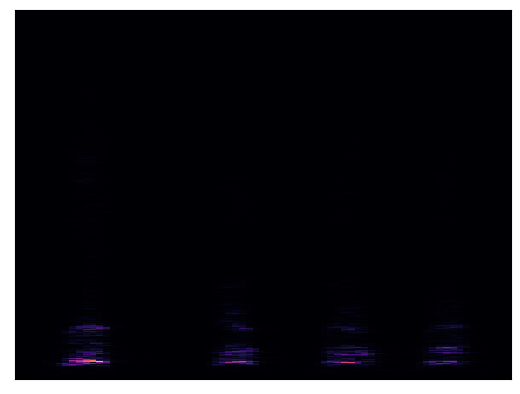

In [5]:
#Apply fourier transformation and plot 

sgram = librosa.stft(y)
librosa.display.specshow(sgram)

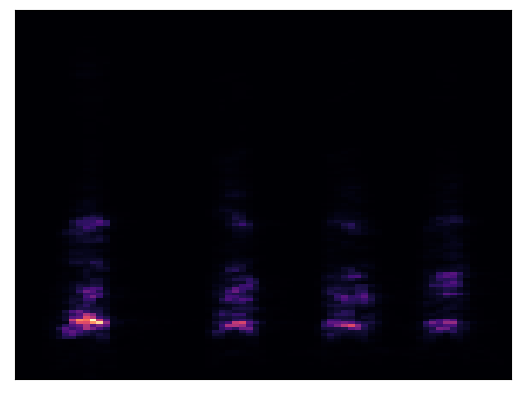

In [6]:
# Create a mel spectrogramm 
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sr)
librosa.display.specshow(mel_scale_sgram)


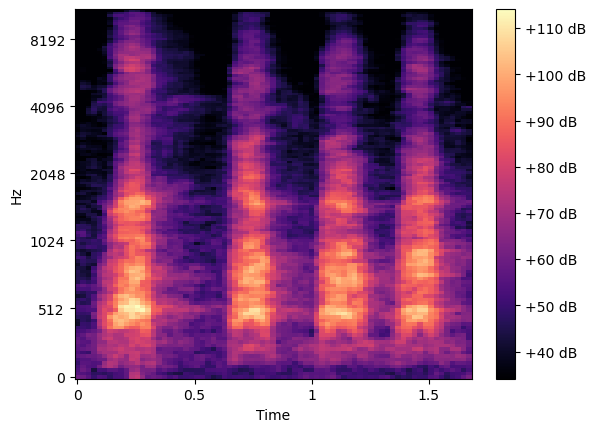

In [7]:

mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(mel_sgram, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

In [57]:
def create_mel_specs (path_to_wav, path_to_png):

    #create a list of all wav files needed to be converted: 
    
    file_list = [file for file in os.listdir(path_to_wav)]
    print(file_list)
    
    for file in file_list:    
        
        #create correct file name for saving
        audio_file = os.path.join(path_to_wav, file)
        output_file = os.path.join(path_to_png, os.path.splitext(file)[0] + '.png')
        
        # load the files and transfrom into np array
        samples, sample_rate = librosa.load(audio_file)
        if not isinstance(samples, np.ndarray):
            samples = np.array(samples)
        
        #apply a stft transformation    
        stft = librosa.stft(samples)

        #modify it in order to use the mel-scale instead of frenquency
        mel_scale_spec, par = librosa.magphase(stft)
        mel_spec = librosa.feature.melspectrogram(S=mel_scale_spec, sr=sample_rate)

        # Go from amplitude to db 
        mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.min)

        # create and save the figure
        plt.figure()        
        librosa.display.specshow(mel_spec_db, x_axis='time', y_axis='mel', sr=sample_rate, fmax=8000)
        plt.axis('off')

        #save plot without any white border
        plt.savefig(output_file, bbox_inches='tight', pad_inches=0, transparent=True)
                

In [58]:
#Test section for the function

# here one might need to activate in order to save the images
## matplotlib.use('Agg')
# This can become a problem later on when trying to show plots in the notebook. Fixed it by restarting the kernel

path_to_wav = 'C:/Users/matthias/Documents/Projects/urban_sound_files/our_dataset_mini/'
path_to_png = 'C:/Users/matthias/Documents/Projects/urban_sound_files/mel_specs/'
test = create_mel_specs(path_to_wav, path_to_png)

['344-3-5-0.wav', '4201-3-2-0.wav', '4910-3-0-0.wav', '6508-9-0-1.wav', '6508-9-0-6.wav', '6902-2-0-12.wav', '6902-2-0-9.wav', '6988-5-0-0.wav', '6988-5-0-1.wav', '6988-5-0-2.wav', '6988-5-0-3.wav', '6988-5-0-4.wav', '6988-5-0-5.wav', '7064-6-1-0.wav', '7067-6-0-0.wav', '7383-3-0-0.wav', '7389-1-0-6.wav']


In [59]:
# actual application of the function:

""" path_to_wav = 'C:/Users/matthias/Documents/Projects/urban_sound_files/our_dataset/'
path_to_png = 'C:/Users/matthias/Documents/Projects/urban_sound_files/mel_specs/'
test = create_mel_specs(path_to_wav, path_to_png) """

['100263-2-0-36.wav', '100648-1-4-0.wav', '100852-0-0-10.wav', '100852-0-0-15.wav', '100852-0-0-27.wav', '100852-0-0-28.wav', '100852-0-0-3.wav', '100852-0-0-4.wav', '100852-0-0-8.wav', '101382-2-0-21.wav', '101382-2-0-29.wav', '101729-0-0-18.wav', '101729-0-0-22.wav', '101729-0-0-33.wav', '101848-9-0-2.wav', '102103-3-0-0.wav', '102106-3-0-0.wav', '102853-8-0-3.wav', '102853-8-0-5.wav', '102857-5-0-0.wav', '102857-5-0-1.wav', '102857-5-0-10.wav', '102857-5-0-11.wav', '102857-5-0-12.wav', '102857-5-0-13.wav', '102857-5-0-14.wav', '102857-5-0-15.wav', '102857-5-0-16.wav', '102857-5-0-17.wav', '102857-5-0-18.wav', '102857-5-0-19.wav', '102857-5-0-2.wav', '102857-5-0-20.wav', '102857-5-0-21.wav', '102857-5-0-22.wav', '102857-5-0-23.wav', '102857-5-0-24.wav', '102857-5-0-25.wav', '102857-5-0-26.wav', '102857-5-0-27.wav', '102857-5-0-28.wav', '102857-5-0-29.wav', '102857-5-0-3.wav', '102857-5-0-30.wav', '102857-5-0-4.wav', '102857-5-0-5.wav', '102857-5-0-6.wav', '102857-5-0-7.wav', '102857-

c:\Users\matthias\miniconda3\envs\thunder3\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(


## Create NNs

## import metadata 

import the UrbanSound8k csv, filter out all entries that are not used in this project and take a look at the data.


In [16]:
df = pd.read_csv(us_file, header=0)
print(df.head(5))

      slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing  


In [27]:
# get rid of all unused files

filtered_df = df[df['slice_file_name'].isin(list_ideng_files + list_of_other_sounds)]
    
print(filtered_df.head(10))

      slice_file_name    fsID  start   end  salience  fold  classID  \
8   100263-2-0-36.wav  100263   18.0  22.0         1     5        2   
14   100652-3-0-0.wav  100652    0.0   4.0         1     2        3   
17   100652-3-0-3.wav  100652    1.5   5.5         1     2        3   
22   100852-0-0-0.wav  100852    0.0   4.0         1     5        0   
28  100852-0-0-14.wav  100852    7.0  11.0         1     5        0   
29  100852-0-0-15.wav  100852    7.5  11.5         1     5        0   
36  100852-0-0-21.wav  100852   10.5  14.5         1     5        0   
74  101729-0-0-18.wav  101729    9.0  13.0         2     9        0   
79  101729-0-0-24.wav  101729   12.0  16.0         2     9        0   
81  101729-0-0-28.wav  101729   14.0  18.0         2     9        0   

               class  
8   children_playing  
14          dog_bark  
17          dog_bark  
22   air_conditioner  
28   air_conditioner  
29   air_conditioner  
36   air_conditioner  
74   air_conditioner  
79   air_co

In [30]:
# As we are only interested in idling engine sounds and use the other files as a non engine control to train our network, 
# we now change the label of everything that is non idling engine sound to that.

filtered_df.loc[filtered_df['class'] != 'engine_idling', 'class'] = 'non_idling_engine'
print(filtered_df.head(100))

       slice_file_name    fsID  start   end  salience  fold  classID  \
8    100263-2-0-36.wav  100263   18.0  22.0         1     5        2   
14    100652-3-0-0.wav  100652    0.0   4.0         1     2        3   
17    100652-3-0-3.wav  100652    1.5   5.5         1     2        3   
22    100852-0-0-0.wav  100852    0.0   4.0         1     5        0   
28   100852-0-0-14.wav  100852    7.0  11.0         1     5        0   
..                 ...     ...    ...   ...       ...   ...      ...   
250   103258-5-0-3.wav  103258    1.5   5.5         1     1        5   
251   103258-5-0-4.wav  103258    2.0   6.0         1     1        5   
252   103258-5-0-5.wav  103258    2.5   6.5         1     1        5   
253   103258-5-0-6.wav  103258    3.0   7.0         1     1        5   
254   103258-5-0-7.wav  103258    3.5   7.5         1     1        5   

                 class  
8    non_idling_engine  
14   non_idling_engine  
17   non_idling_engine  
22   non_idling_engine  
28   non_i

In [16]:

# Preprocess and batch the dataset (add any necessary preprocessing here)
batch_size = 100
dataset = dataset.batch(batch_size) 


In [11]:

# Define your model
def define_model (input_shape):
    model = tf.keras.Sequential([
        
        tf.keras.layers.Input(shape=input_shape),
        
        tf.keras.layers.Dense(264, activation="relu"),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Dense(1, activation="sgd")
        ])

# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(dataset, epochs=10)
    


In [13]:
# setup tensorboard
root_logdir = os.path.join(os.curdir, 'logs')

tb_callback = tf.keras.callbacks.TensorBoard(log_dir='logs/', histogram_freq=1)



In [14]:
# launch tensorboard
%load_ext tensorboard
%tensorboard --logdir logs/fit
